In [1]:
import pandas as pd

#Loading the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
test_labels_df = pd.read_csv('test_labels.csv')

# Merging test dataset with its labels for a complete test set
test_merged_df = test_df.merge(test_labels_df, on='id')


In [2]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

nltk.download('punkt')

# Tokenization function to count sentences and words
def count_tokens(text):
    sentences = sent_tokenize(text)
    words = word_tokenize(text)
    return len(sentences), len(words)

#Applying tokenization function to the train dataset
train_df['sentence_count'], train_df['word_count'] = zip(*train_df['comment_text'].apply(count_tokens))

#Grouping by each class and calculate mean sentence and word counts
class_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
for column in class_columns:
    grouped_data = train_df.groupby(column).agg({'sentence_count': 'mean', 'word_count': 'mean'})
    print(f"\nClass: {column}\n", grouped_data)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ENVY\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.



Class: toxic
        sentence_count  word_count
toxic                            
0            4.396127   82.168953
1            4.255721   63.173990

Class: severe_toxic
               sentence_count  word_count
severe_toxic                            
0                   4.351085   80.139648
1                   7.510972  101.023197

Class: obscene
          sentence_count  word_count
obscene                            
0              4.384967   81.438063
1              4.341579   60.858090

Class: threat
         sentence_count  word_count
threat                            
0             4.377188   80.346854
1             6.207113   80.859833

Class: insult
         sentence_count  word_count
insult                            
0             4.391321   81.437282
1             4.216072   59.378697

Class: identity_hate
                sentence_count  word_count
identity_hate                            
0                    4.387605   80.518500
1                    3.827046   61.198577

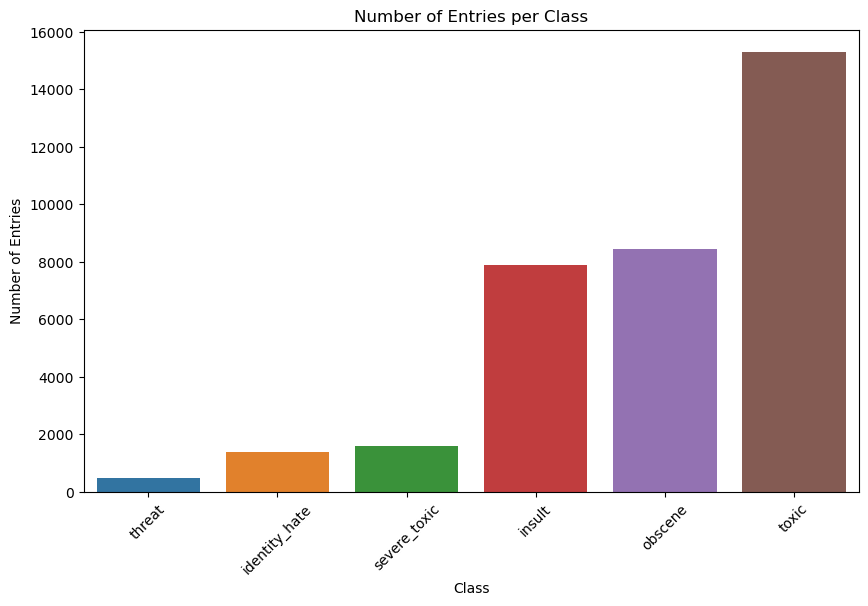

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

#Counting the number of entries for each class
class_distribution = train_df[class_columns].sum().sort_values()

#Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Number of Entries per Class')
plt.ylabel('Number of Entries')
plt.xlabel('Class')
plt.xticks(rotation=45)
plt.show()


In [4]:
from collections import Counter
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def get_most_common_words(class_name, n=10):
    # Filter comments by class
    filtered_comments = train_df[train_df[class_name] == 1]['comment_text']
    #Tokenizing and removin stop words
    words = [word for text in filtered_comments for word in word_tokenize(text.lower()) if word.isalpha() and word not in stop_words]
    # Count and return the most common words
    return Counter(words).most_common(n)

# Displaying the most common words for each class
for column in class_columns:
    print(f"\nMost Common Words for {column}:")
    print(get_most_common_words(column))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ENVY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Most Common Words for toxic:
[('fuck', 9238), ('shit', 3580), ('like', 3485), ('wikipedia', 3385), ('nigger', 3290), ('suck', 3226), ('fucking', 3187), ('ass', 2885), ('go', 2859), ('u', 2765)]

Most Common Words for severe_toxic:
[('fuck', 6641), ('suck', 2532), ('ass', 2105), ('shit', 1878), ('faggot', 1570), ('u', 1557), ('fucking', 1373), ('go', 1239), ('die', 1156), ('bitch', 1110)]

Most Common Words for obscene:
[('fuck', 9161), ('shit', 3183), ('fucking', 3092), ('suck', 3013), ('ass', 2801), ('nigger', 2720), ('u', 2234), ('go', 2142), ('bitch', 1777), ('wikipedia', 1690)]

Most Common Words for threat:
[('die', 1167), ('ass', 769), ('kill', 504), ('going', 294), ('block', 170), ('must', 167), ('fuck', 166), ('jim', 158), ('wales', 157), ('fucking', 136)]

Most Common Words for insult:
[('fuck', 7249), ('suck', 2787), ('nigger', 2773), ('fucking', 2707), ('go', 2231), ('ass', 2170), ('u', 2141), ('fat', 1923), ('faggot', 1860), ('bitch', 1719)]

Most Common Words for identity

In [18]:
test_merged_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,":If you have a look back at the source, the in...",-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,I don't anonymously edit articles at all.,-1,-1,-1,-1,-1,-1


In [19]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,sentence_count,word_count
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,3,49
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,4,27
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,3,48
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,4,128
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,2,18


In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Filtering out the rows where the label columns are -1 (which means the label is not provided)
test_merged_df = test_merged_df[test_merged_df['toxic'] >= 0]

# Combining the train and test dataframes to vectorize the text data
full_text = pd.concat([train_df['comment_text'], test_merged_df['comment_text']])

# Vectorizing the text data
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_vectorizer.fit(full_text)
X_train = tfidf_vectorizer.transform(train_df['comment_text'])
X_test = tfidf_vectorizer.transform(test_merged_df['comment_text'])

# Preparing the target variables
y_train = train_df.iloc[:, 2:8]
y_test = test_merged_df.iloc[:, 2:8]


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score

# Logistic Regression Model
lr_model = OneVsRestClassifier(LogisticRegression(random_state=42))

print("Training Logistic Regression...")
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Calculating metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average='macro')
recall_lr = recall_score(y_test, y_pred_lr, average='macro')
precision_lr = precision_score(y_test, y_pred_lr, average='macro')
auc_lr = roc_auc_score(y_test, lr_model.predict_proba(X_test), average='macro', multi_class='ovr')

# Printing the metrics
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"F1-score: {f1_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"AUC: {auc_lr:.4f}\n")


Training Logistic Regression...


C:\Users\ENVY\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ENVY\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Logistic Regression Performance:
Accuracy: 0.8945
F1-score: 0.5051
Recall: 0.4531
Precision: 0.6075
AUC: 0.9707



In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming `train_df['comment_text']` and `test_merged_df['comment_text']` are the series with the text data
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit the vectorizer on the training data and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['comment_text'])

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(test_merged_df['comment_text'])


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

# Define the classifiers
classifiers = {
    'Logistic Regression': OneVsRestClassifier(LogisticRegression(random_state=42)),
    'Support Vector Machine': OneVsRestClassifier(SVC(probability=True, random_state=42)),
    'Naïve Bayes': OneVsRestClassifier(MultinomialNB())
}


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score

# Function to train and evaluate the classifiers
def train_eval_classifiers(classifiers, X_train, y_train, X_test, y_test):
    results = {}
    for name, clf in classifiers.items():
        print(f"Training {name}...")
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_pred_proba = clf.predict_proba(X_test) if hasattr(clf, "predict_proba") else None
        
        # Calculating metrics
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        precision = precision_score(y_test, y_pred, average='macro')
        auc = roc_auc_score(y_test, y_pred_proba, average='macro', multi_class='ovr') if y_pred_proba is not None else None
        
        # Saving results
        results[name] = {
            'Accuracy': accuracy,
            'F1 Score': f1,
            'Recall': recall,
            'Precision': precision,
            'AUC': auc
        }
        
        # Print the metrics
        print(f"{name} Performance:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"F1-score: {f1:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"AUC: {auc:.4f}\n" if auc is not None else "AUC: Not available\n")
    
    return results

# Training and evaluating the classifiers
y_train = train_df.iloc[:, 2:8]  # Assuming these are the label columns
y_test = test_merged_df.iloc[:, 2:8]  # Assuming these are the label columns
results = train_eval_classifiers(classifiers, X_train_tfidf, y_train, X_test_tfidf, y_test)



Training Logistic Regression...


C:\Users\ENVY\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ENVY\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Logistic Regression Performance:
Accuracy: 0.8932
F1-score: 0.5006
Recall: 0.4544
Precision: 0.5868
AUC: 0.9694

Training Support Vector Machine...
